#Importing the Required Libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay

#**Reading and Understanding The Dataset**

#Loading the dataset into a dataframe and displaying the first 5 rows wuth the head() method

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank/bank-full.csv',delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Let's find out the shape of the dataset using the `shape` attribute

In [ ]:
df.shape

(45211, 17)

#There are forty five thousand two hundred and eleven rows and seventeen columns/features

##Using `info` function, we will take a look at our types of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##According to the output above, we have 45211 entries, 0 to 45210, as well as 17 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 891 then there is no missing values for that particular feature.

##We also have a mix of numerical 7 int64 and  10 object data types originally.

#Checking for missing values

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


##There are no missing values in this dataset


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


#Imbalanced Dataset

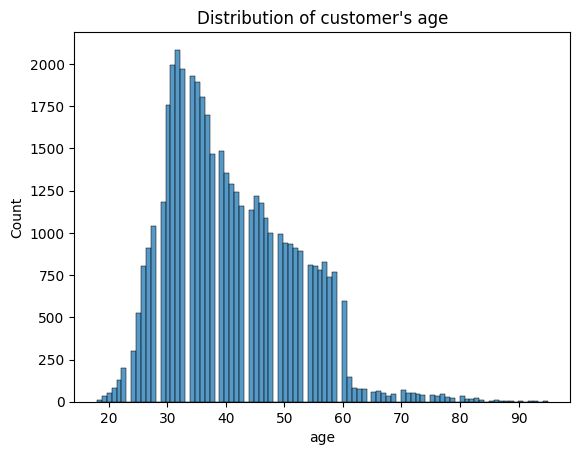

In [ ]:
#distribution of the age of the customers
sns.histplot(x='age',data=df)
plt.title("Distribution of customer's age");

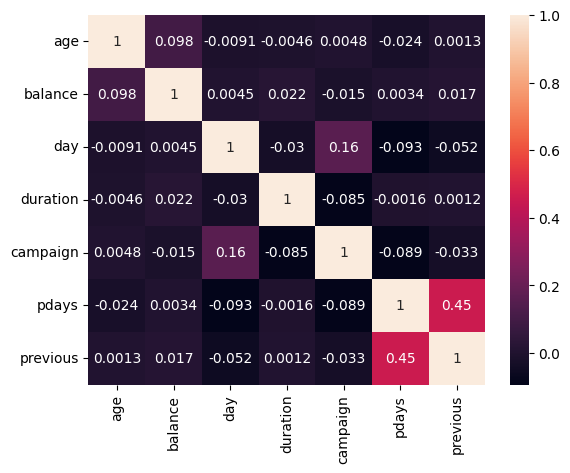

In [ ]:
corr=df.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
subscription_rate = (df['y'].value_counts(normalize=True) * 100)['yes']
print(f"The subscription rate for term deposits is: {subscription_rate:.2f}%")


The subscription rate for term deposits is: 11.70%


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


<Axes: title={'center': 'Job Distribution among Customers'}, xlabel='job'>

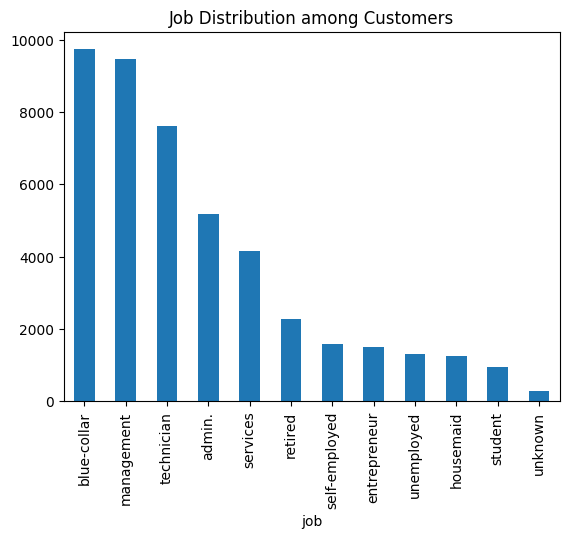

In [ ]:
# Job distribution among the customers
job_distribution = df['job'].value_counts()
print(job_distribution)
job_distribution.plot(kind='bar', title="Job Distribution among Customers")

In [ ]:
#What is the average balance for customers of different education levels?
avg_balance_by_education = df.groupby('education')['balance'].mean()
avg_balance_by_education


,balance
education,
primary,1250.949934
secondary,1154.880786
tertiary,1758.416435
unknown,1526.754443


In [ ]:
#What is the average balance for customers of different job levels?
job_distribution = df.groupby('job')['balance'].mean()
job_distribution

,balance
job,
admin.,1135.838909
blue-collar,1078.826654
entrepreneur,1521.470074
housemaid,1392.395161
management,1763.616832
retired,1984.215106
self-employed,1647.970868
services,997.088108
student,1388.060768


y                no        yes
marital                       
divorced  88.054542  11.945458
married   89.876534  10.123466
single    85.050821  14.949179


<Axes: xlabel='marital'>

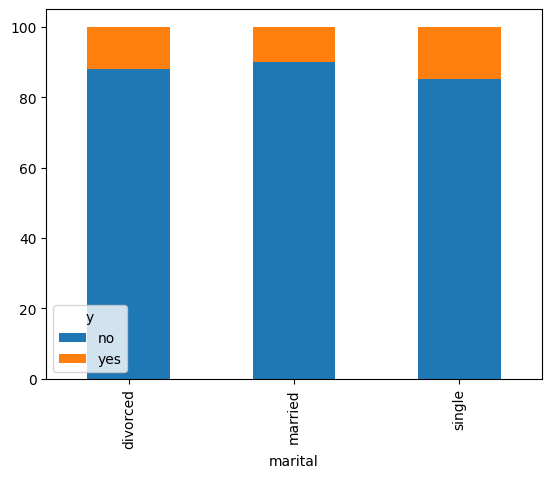

In [ ]:
#Does marital status has any relationship with the subsription rate?
subscription_by_marital = pd.crosstab(df['marital'], df['y'], normalize='index') * 100
print(subscription_by_marital)
subscription_by_marital.plot(kind='bar', stacked=True)


y                 no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509
unknown    95.929339   4.070661


<Axes: xlabel='contact'>

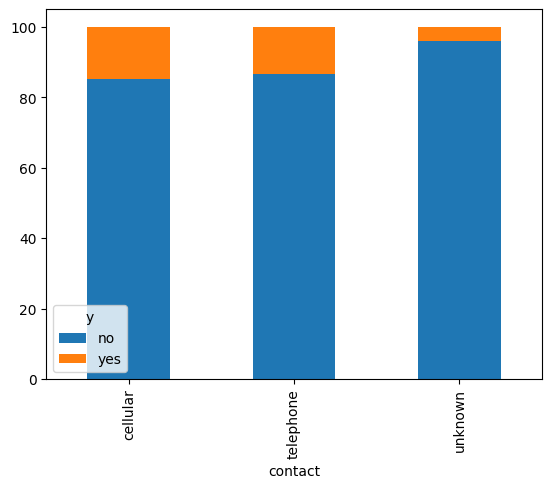

In [ ]:
#Is there a significant difference in subscription rates between customers contacted by phone vs. cellular?
subscription_by_contact = pd.crosstab(df['contact'], df['y'], normalize='index') * 100
print(subscription_by_contact)
subscription_by_contact.plot(kind='bar', stacked=True)


In [ ]:
#What is the impact of previous campaign outcomes on the current campaign’s subscription rate?
previous_campaign_impact = df.groupby(['previous', 'y']).size().unstack()
previous_campaign_impact['subscription_rate'] = previous_campaign_impact['yes'] / (previous_campaign_impact['yes'] + previous_campaign_impact['no']) * 100
previous_campaign_impact[['yes', 'no', 'subscription_rate']].reset_index().head()

y,previous,yes,no,subscription_rate
0,0,3384.0,33570.0,9.157331
1,1,583.0,2189.0,21.031746
2,2,456.0,1650.0,21.652422
3,3,294.0,848.0,25.744308
4,4,171.0,543.0,23.949580


#Encoding Categorical variables

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


#**Split**

In [ ]:
target = "y"
X = df[df.columns].drop(columns='y')
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (45211, 16)
y shape: (45211,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 16)
y_train shape: (36168,)
X_test shape: (9043, 16)
y_test shape: (9043,)


#**Resample**

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(8396, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10451,39,4,0,2,0,452,1,0,2,12,6,232,2,-1,0,3
5817,51,1,1,0,0,21,0,0,2,26,8,153,1,-1,0,3
6720,25,1,2,1,0,1966,1,0,2,28,8,209,1,-1,0,3
8284,58,9,1,1,0,2073,0,0,2,2,6,393,3,-1,0,3
6347,37,2,2,2,0,-274,1,1,2,27,8,237,2,-1,0,3


In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (63940, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,1,1,0,0,849,1,0,2,15,8,72,1,-1,0,3
1,49,9,1,0,0,1415,1,0,0,30,5,269,2,-1,0,3
2,42,0,1,1,0,3842,0,0,0,31,5,130,4,-1,0,3
3,37,4,2,2,0,-119,1,0,2,11,6,375,11,-1,0,3
4,56,1,1,0,0,3498,0,0,0,15,0,264,2,-1,0,3


#**Build Model**

In [ ]:
model =DecisionTreeClassifier(random_state=42)

In [ ]:
#fitting on the reguar model
model.fit(X_train,y_train)

# Fit on X_train_under, y_train_under
model_under =DecisionTreeClassifier(random_state=42)

model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =DecisionTreeClassifier(random_state=42)

model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [ ]:
#checking the accuracy_score for each model
for m in [model, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print(f"Training Accuracy for:", round(acc_train, 4))
    print(f"Test Accuracy for:", round(acc_test, 4))

Training Accuracy for: 1.0
Test Accuracy for: 0.874
Training Accuracy for: 0.8345
Test Accuracy for: 0.7814
Training Accuracy for: 1.0
Test Accuracy for: 0.8714


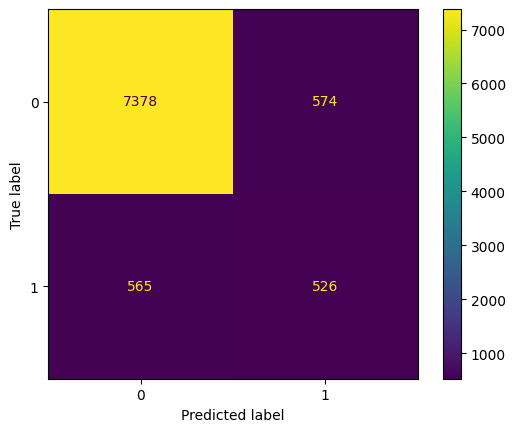

In [ ]:
#There seems to be a tie betwwen the regular and the over model.But accuracy is the best metric to evaluate a model so let's check the confusion matrix
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

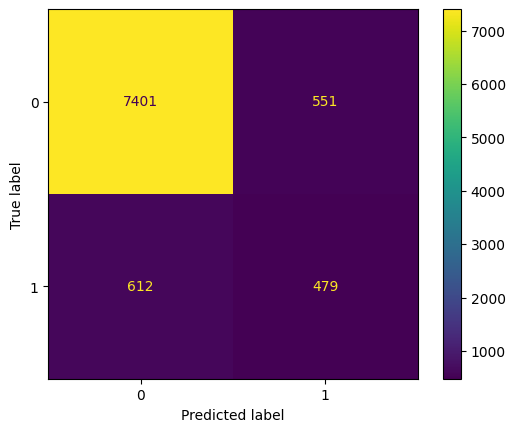

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over,X_test,y_test);

In [31]:
#looking at both confusion matrix, the `model_over` which is the model trained with the over sampled dataset did slightly better than the regular model.moving on we would be using the `model_over'.
#Using  k-fold cross validation for the validation of the  model with a fold of 5 and n_jobs=-1 to speed up the training process
cv_acc_scores = cross_val_score(model_over,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)
print(f"the mean cv_score for the 5 fold is {cv_acc_scores.mean()}")

[0.95933688 0.96238661 0.95800751 0.96402878 0.96238661]
the mean cv_score for the 5 fold is 0.9612292774476071


#Hyperparameter Tuning

In [32]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

In [33]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [34]:
# Extract best hyperparameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

#**Evaluation**

In [36]:
acc_train = accuracy_score(best_model.predict(X_train_over),y_train_over)
acc_test = accuracy_score(best_model.predict(X_test),y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9992
Test Accuracy: 0.8706


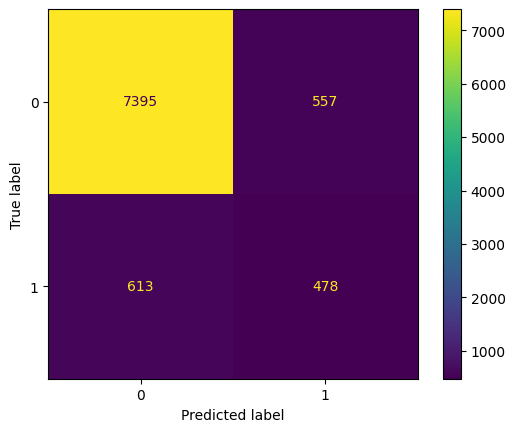

In [37]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test);

#**Communicating The Model**

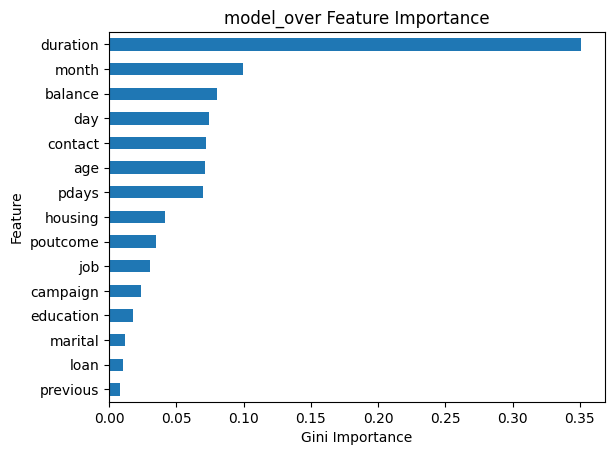

In [40]:
# Get importances
importances = best_model.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plotting the most effcetive features of the datasets for predicting the target variable.
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

#The above plot shows top 15 most effective predictive feature of the dataset based on the `gini impurity`.

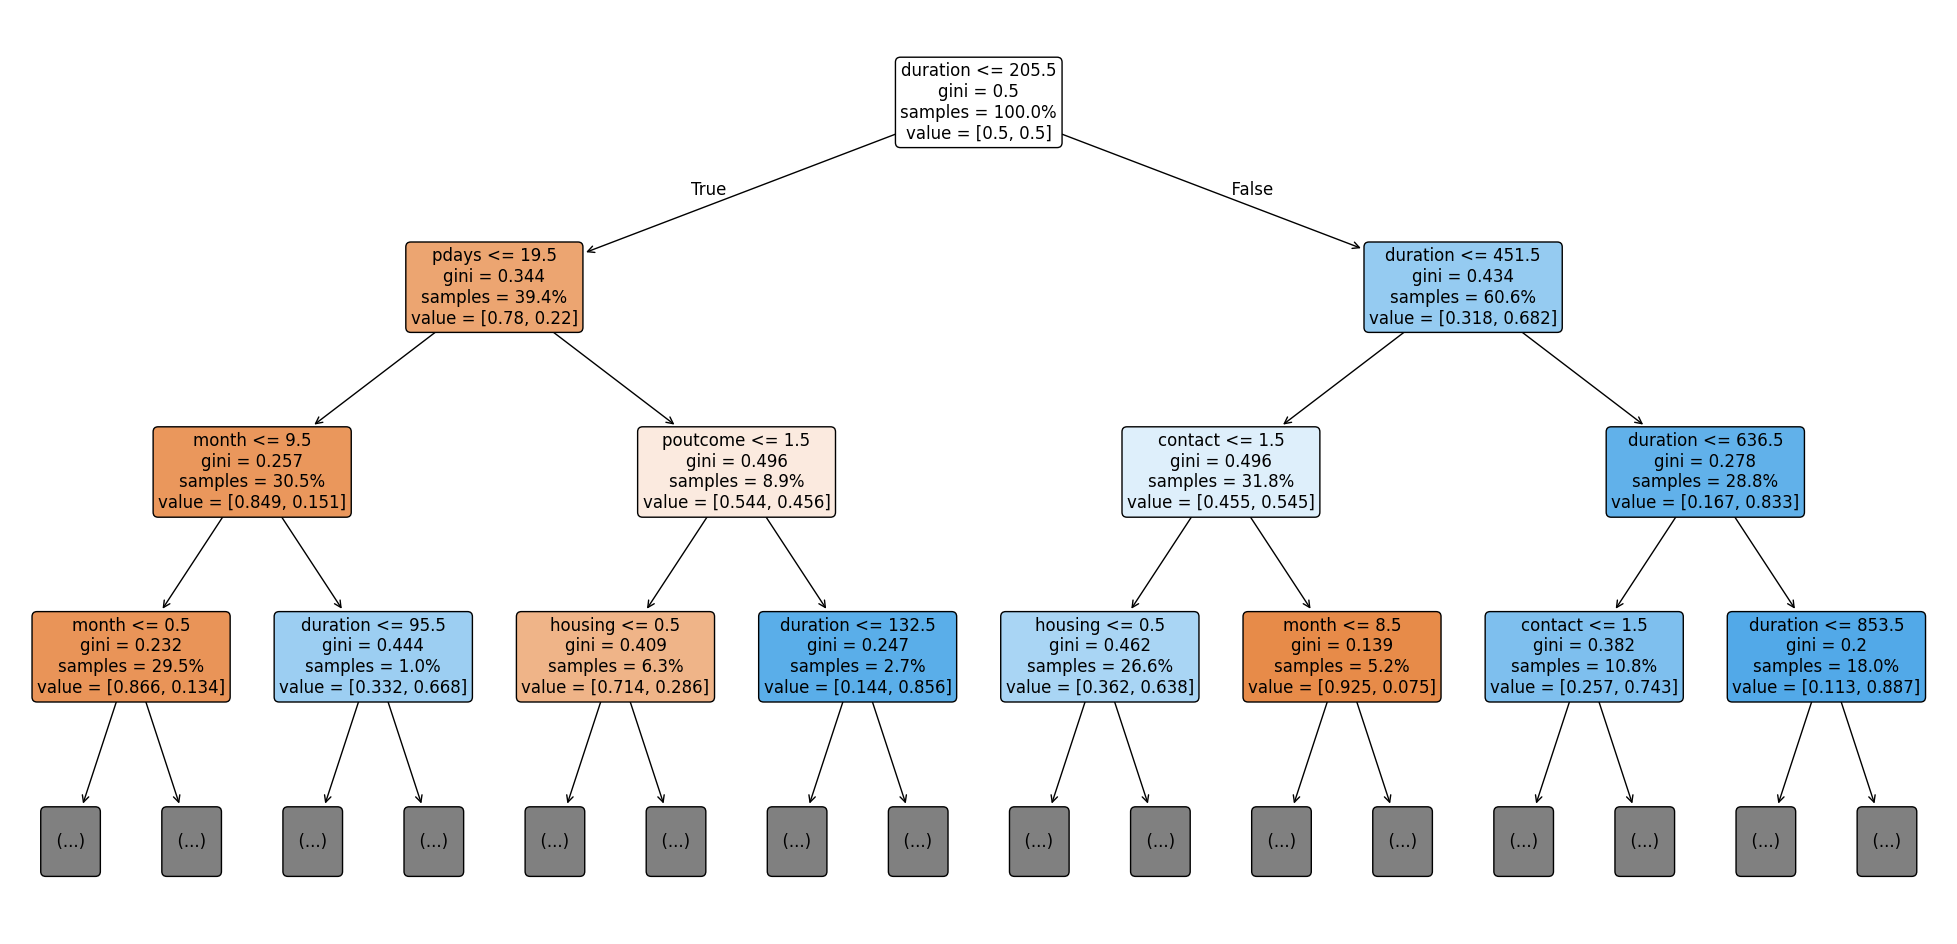

In [41]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=best_model,
    feature_names=X_train.columns.tolist(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

#The above plot uses the plot_tree function from scikit-learn to visualize the decision logic of your model.

#I would recommend a better model e.g ensemble models like RandomForestClassifier or XGBoostClassifier for a better result.